# Aprendizaje no supervisado

In [9]:
import pandas as pd

# Cargar los datos proporcionados por el usuario
overall_path = '../data/overall_limpio.csv'
jugadores_path = '../data/jugadores_limpio.csv'

# Leer los archivos CSV
overall_df = pd.read_csv(overall_path)
jugadores_df = pd.read_csv(jugadores_path)

# Mostrar las primeras filas de cada dataframe para entender su estructura
(overall_df.head(), jugadores_df.head())

(      Season  Rk            Squad    MP    W    D    L    GF    GA    GD  \
 0  2022-2023   W  Manchester City  13.0  8.0  5.0  0.0  32.0   5.0  27.0   
 1  2022-2023   F            Inter  13.0  7.0  3.0  3.0  19.0  11.0   8.0   
 2  2022-2023  SF      Real Madrid  12.0  8.0  2.0  2.0  26.0  13.0  13.0   
 3  2022-2023  SF            Milan  12.0  5.0  3.0  4.0  15.0  11.0   4.0   
 4  2022-2023  QF    Bayern Munich  10.0  8.0  1.0  1.0  22.0   6.0  16.0   
 
     Pts  Attendance                      Top Team Scorer        Goalkeeper  \
 0  29.0     63639.0                       Erling Haaland           Ederson   
 1  24.0     71415.0                           Edin Džeko       André Onana   
 2  26.0     58761.0                      Vinicius Júnior  Thibaut Courtois   
 3  18.0     72546.0                       Olivier Giroud      Mike Maignan   
 4  25.0     75000.0  Leroy Sané,Eric Maxim Choupo-Moting       Yann Sommer   
 
    Top Team Scorer Goals  Country  
 0                   12

c:\Users\albab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\albab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


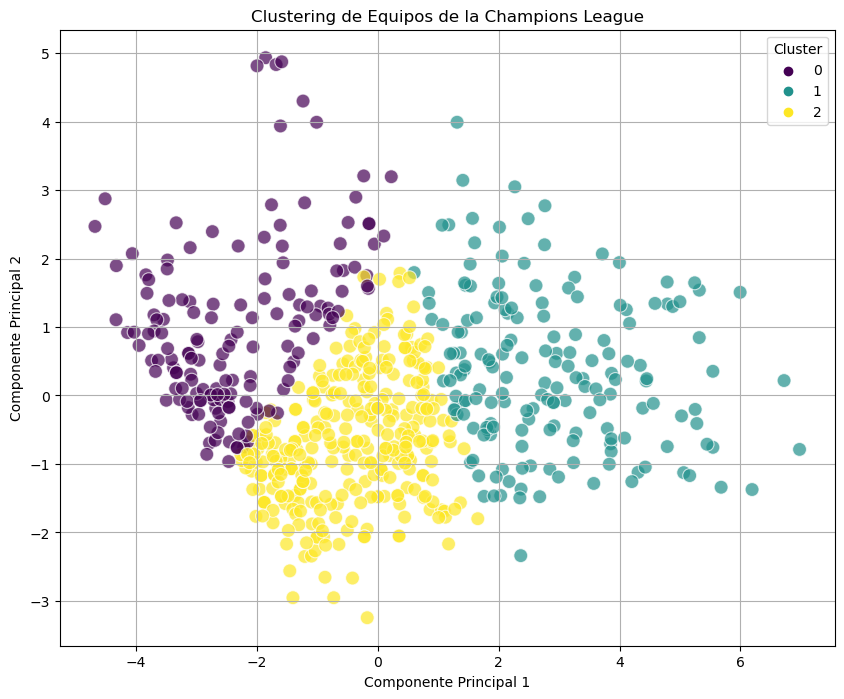

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar columnas numéricas relevantes para el clustering
columns_to_cluster = ['MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts']

# Extraer las columnas relevantes
data_to_cluster = overall_df[columns_to_cluster]

# Normalizar los datos
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_to_cluster)

# Aplicar KMeans para agrupar los equipos en 3 clusters
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(data_normalized)

# Añadir la asignación de clusters al dataframe original para análisis posterior
overall_df['Cluster'] = kmeans.labels_

# Visualizar los clusters utilizando PCA para reducir la dimensionalidad a 2D y facilitar la visualización
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_normalized)

# Añadir los componentes principales al dataframe para la visualización
overall_df['Principal Component 1'] = principalComponents[:,0]
overall_df['Principal Component 2'] = principalComponents[:,1]

# Gráfica de los clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=overall_df, x='Principal Component 1', y='Principal Component 2', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('Clustering de Equipos de la Champions League')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [17]:
# Crear un resumen de los equipos por cluster
clusters_summary = overall_df.groupby('Cluster')['Squad'].apply(list).reset_index()

# Calcular estadísticas descriptivas por cluster para entender las diferencias entre ellos
clusters_stats = overall_df.groupby('Cluster')[columns_to_cluster].mean().reset_index()

# Mostrar el resumen de equipos por cluster y las estadísticas descriptivas
clusters_summary, clusters_stats


(   Cluster                                              Squad
 0        0  [Eint Frankfurt, Ajax, Dinamo Zagreb, Juventus...
 1        1  [Manchester City, Inter, Real Madrid, Milan, B...
 2        2  [Chelsea, Liverpool, Paris S-G, Porto, RB Leip...,
    Cluster         MP         W         D         L         GF         GA  \
 0        0   7.370130  1.435065  1.259740  4.675325   7.246753  15.344156   
 1        1  11.526012  6.317919  2.942197  2.335260  21.641618  11.127168   
 2        2   7.658147  2.814696  2.130990  2.712460  10.175719   9.904153   
 
           GD        Pts  
 0  -8.097403   5.564935  
 1  10.514451  21.895954  
 2   0.271565  10.575080  )


Basándonos en la información proporcionada, hemos identificado tres clusters distintos de equipos que participaron en la Champions League, cada uno con características únicas según su rendimiento. 

### Cluster 0

* **Características Generales:** Este cluster agrupa a equipos con el menor rendimiento en general, con un promedio de partidos jugados, victorias, y puntos significativamente más bajos que los otros grupos. Además, estos equipos tienen una diferencia de goles negativa notable, indicando que han recibido más goles de los que han anotado.

* **Equipos Ejemplo:** Eint Frankfurt, Ajax, Dinamo Zagreb, Juventus, entre otros. Estos equipos han tenido un desempeño menos favorable en la competición.

### Cluster 1

* **Características Generales:** Representa a los equipos con el mejor desempeño. Tienen el mayor número de partidos jugados, victorias, y puntos. Además, la diferencia de goles es positivamente alta, lo que indica un fuerte desempeño ofensivo y defensivo.

* **Equipos Ejemplo:** Manchester City, Inter, Real Madrid, Milan, Bayern Munich, entre otros. Estos son los equipos más exitosos en el dataset, mostrando un fuerte desempeño que los coloca como potenciales favoritos para ganar el torneo.

### Cluster 2

* **Características Generales:** Este grupo está en un punto intermedio entre los otros dos clusters. Mientras que tienen un mejor rendimiento que los equipos del Cluster 0, no alcanzan los altos estándares del Cluster 1. La diferencia de goles es marginalmente positiva, indicando un equilibrio más ajustado entre goles a favor y en contra.

* **Equipos Ejemplo:** Chelsea, Liverpool, Paris S-G, Porto, RB Leipzig, entre otros. Aunque estos equipos han mostrado capacidades competitivas, sus estadísticas indican que tienen áreas de mejora para alcanzar el nivel más alto de desempeño en la competición.

c:\Users\albab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\albab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\albab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\albab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

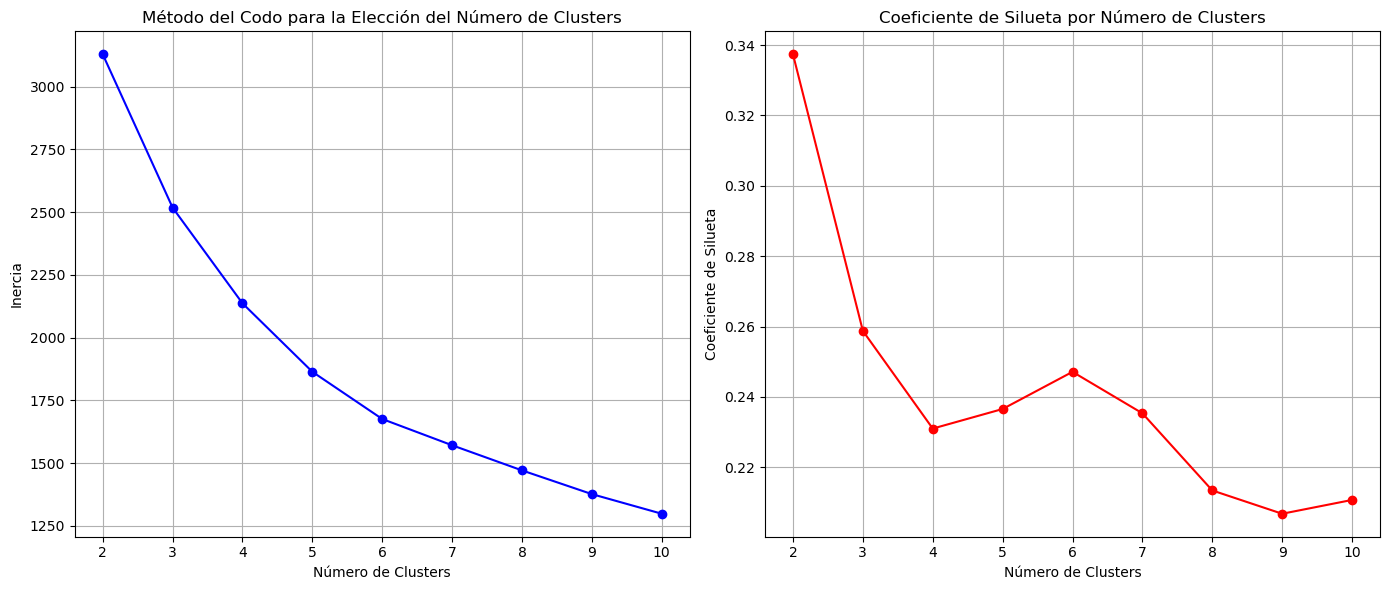

In [11]:
from sklearn.metrics import silhouette_score
import numpy as np

# Determinar el rango de números de clusters a evaluar
range_n_clusters = range(2, 11)

# Listas para almacenar los resultados de la suma de cuadrados dentro del cluster (inertia) y el coeficiente de silueta
inertias = []
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_normalized)
    inertias.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(data_normalized, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Gráfica del Método del Codo
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, inertias, marker='o', color='b')
plt.title('Método del Codo para la Elección del Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.grid(True)

# Gráfica del Coeficiente de Silueta
plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_scores, marker='o', color='r')
plt.title('Coeficiente de Silueta por Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silueta')
plt.grid(True)

plt.tight_layout()
plt.show()


c:\Users\albab\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


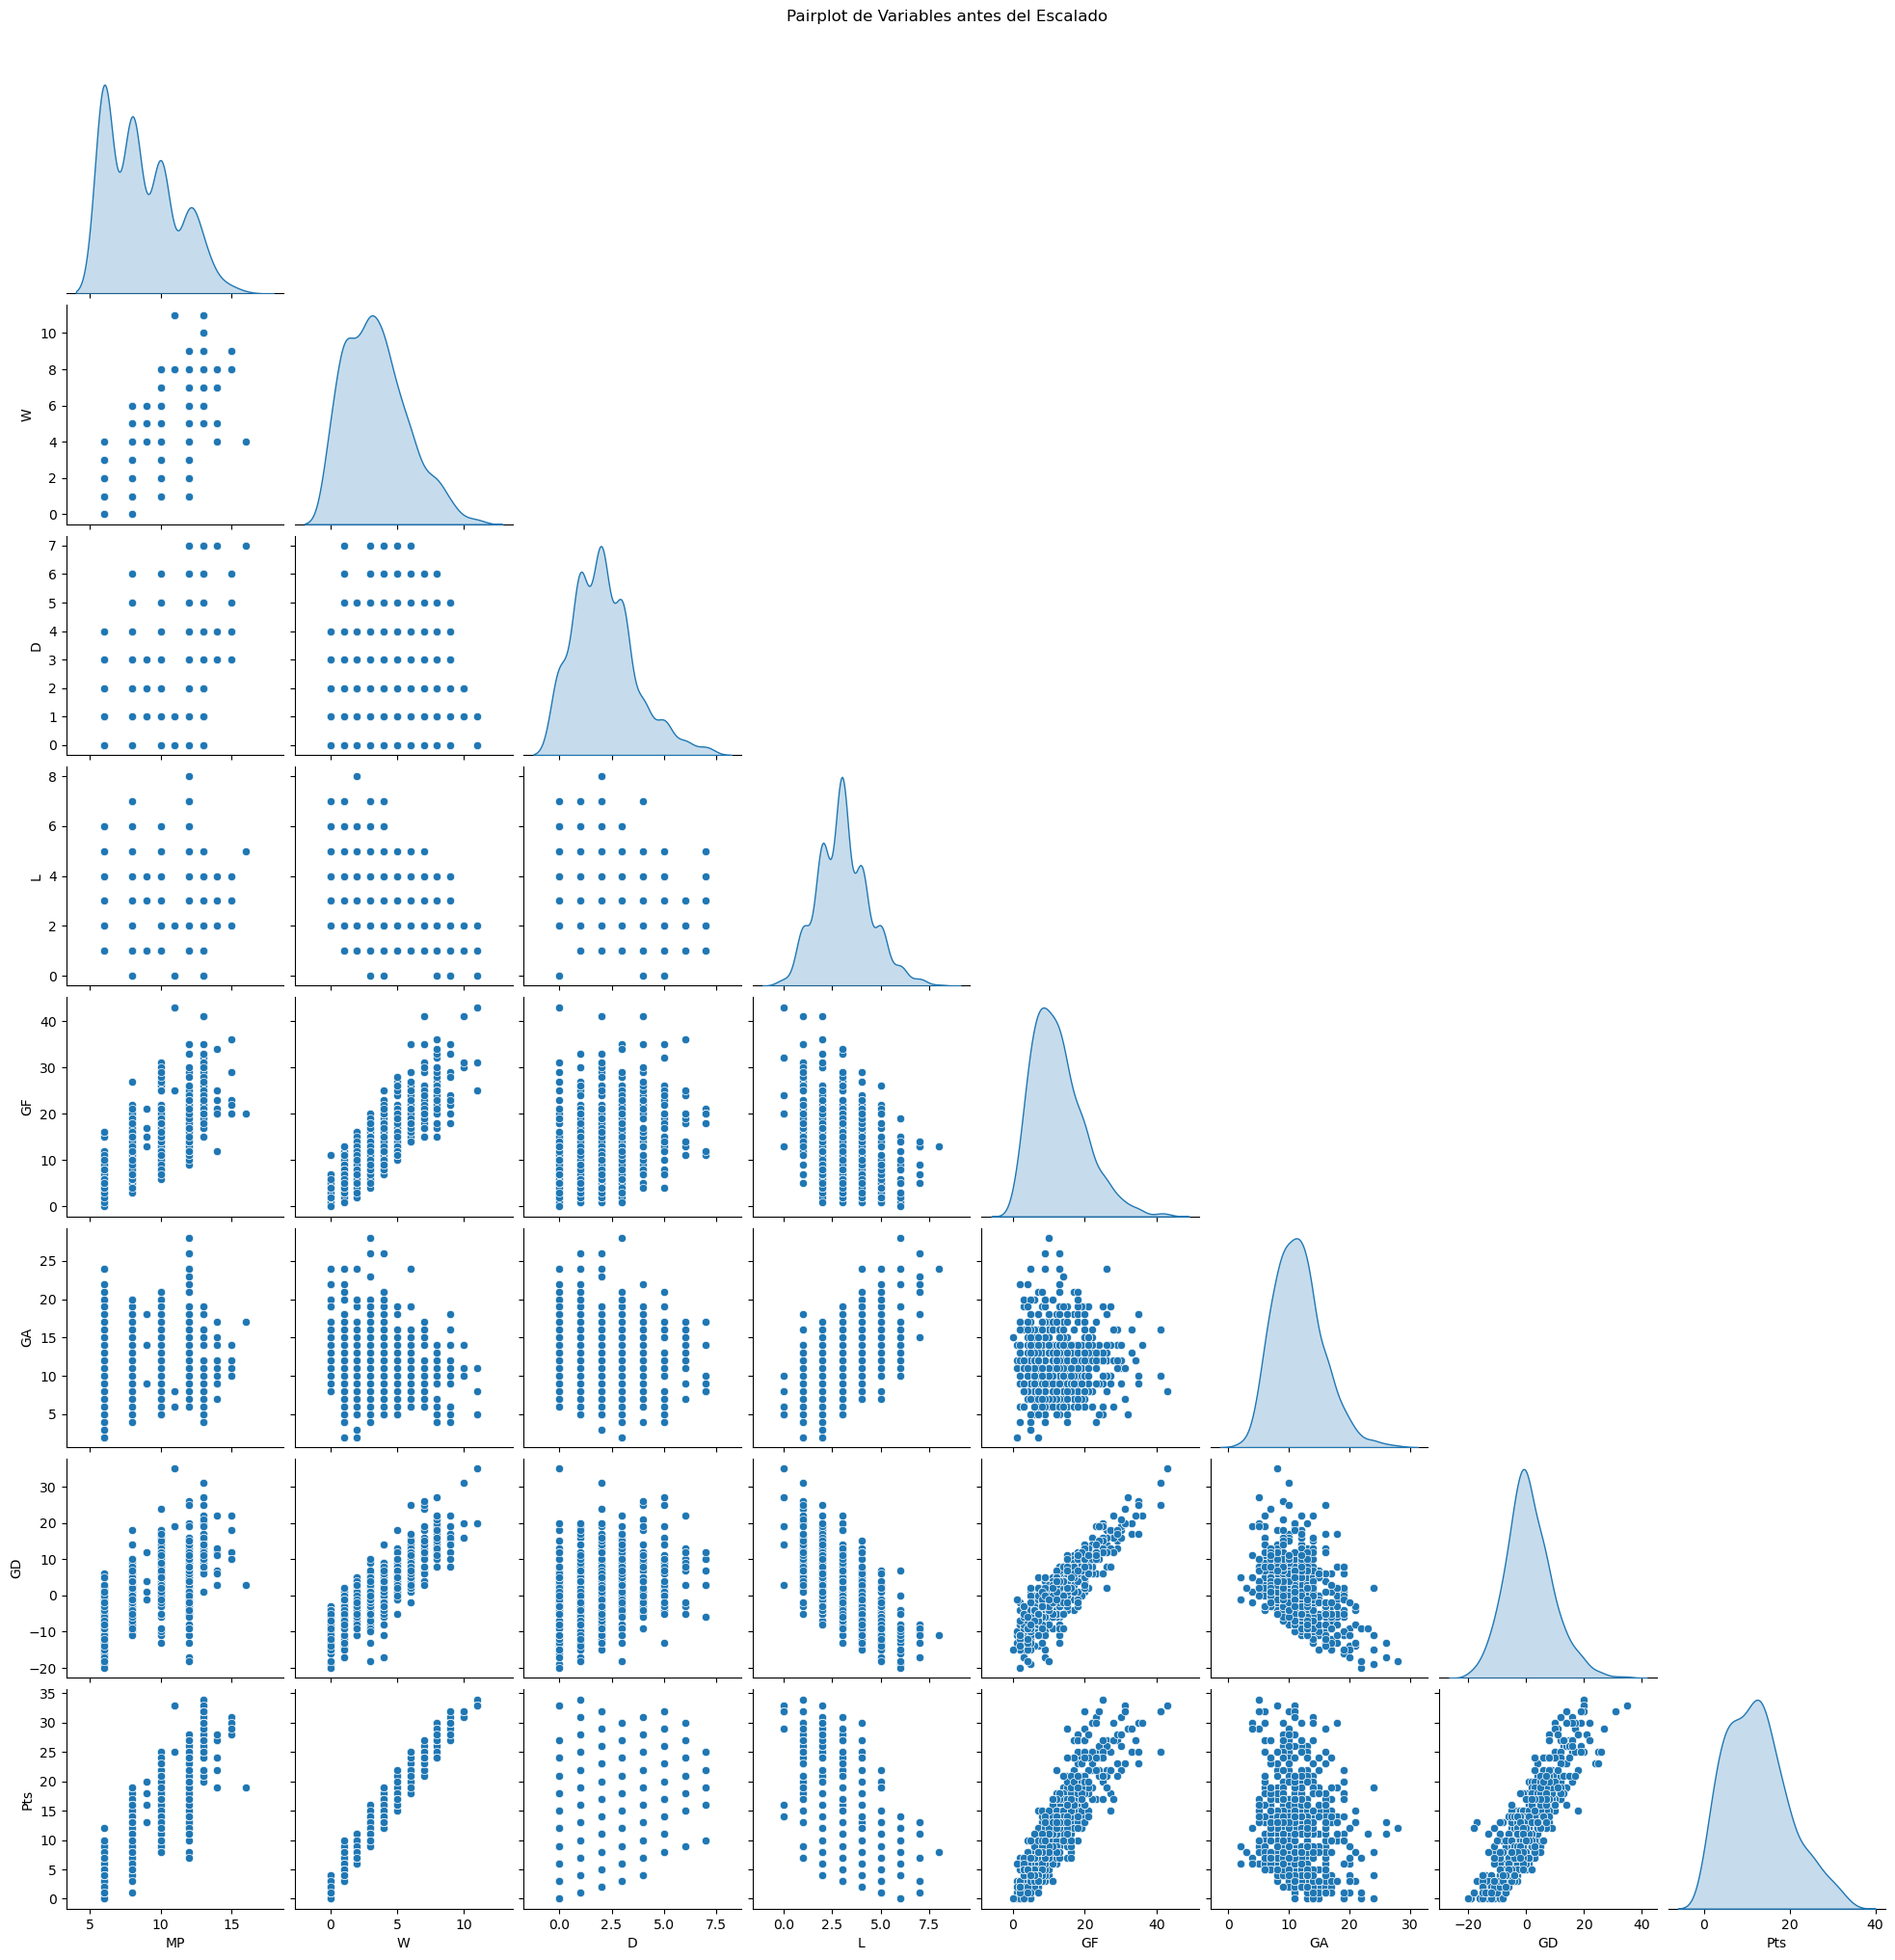

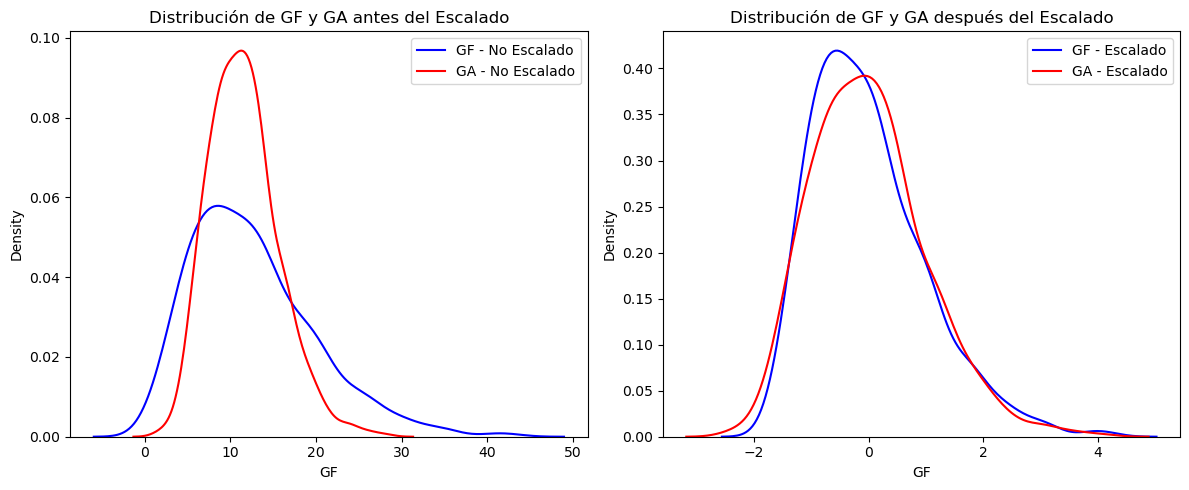

In [12]:
# Antes de reintentar el pairplot, verificamos y preprocesamos los datos para asegurarnos de que sean adecuados
# Eliminamos filas con valores NaN en las columnas seleccionadas para el clustering
cleaned_df = overall_df[columns_to_cluster].dropna()

# Ahora intentamos generar el pairplot nuevamente
sns.pairplot(cleaned_df, diag_kind='kde', corner=True)
plt.suptitle('Pairplot de Variables antes del Escalado', y=1.02)
plt.show()

# Para visualizar los efectos del escalado, comparamos las distribuciones antes y después del escalado.
# Seleccionamos una muestra de columnas para simplificar la visualización
sample_columns = ['GF', 'GA']  # Ejemplo con Goles a Favor y Goles en Contra

# Visualización de los datos antes del escalado
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.kdeplot(data=cleaned_df, x='GF', ax=axs[0], color='blue', label='GF - No Escalado')
sns.kdeplot(data=cleaned_df, x='GA', ax=axs[0], color='red', label='GA - No Escalado')
axs[0].set_title('Distribución de GF y GA antes del Escalado')
axs[0].legend()

# Visualización de los datos después del escalado
scaled_df = pd.DataFrame(data_normalized, columns=columns_to_cluster)
sns.kdeplot(data=scaled_df, x='GF', ax=axs[1], color='blue', label='GF - Escalado')
sns.kdeplot(data=scaled_df, x='GA', ax=axs[1], color='red', label='GA - Escalado')
axs[1].set_title('Distribución de GF y GA después del Escalado')
axs[1].legend()

plt.tight_layout()
plt.show()


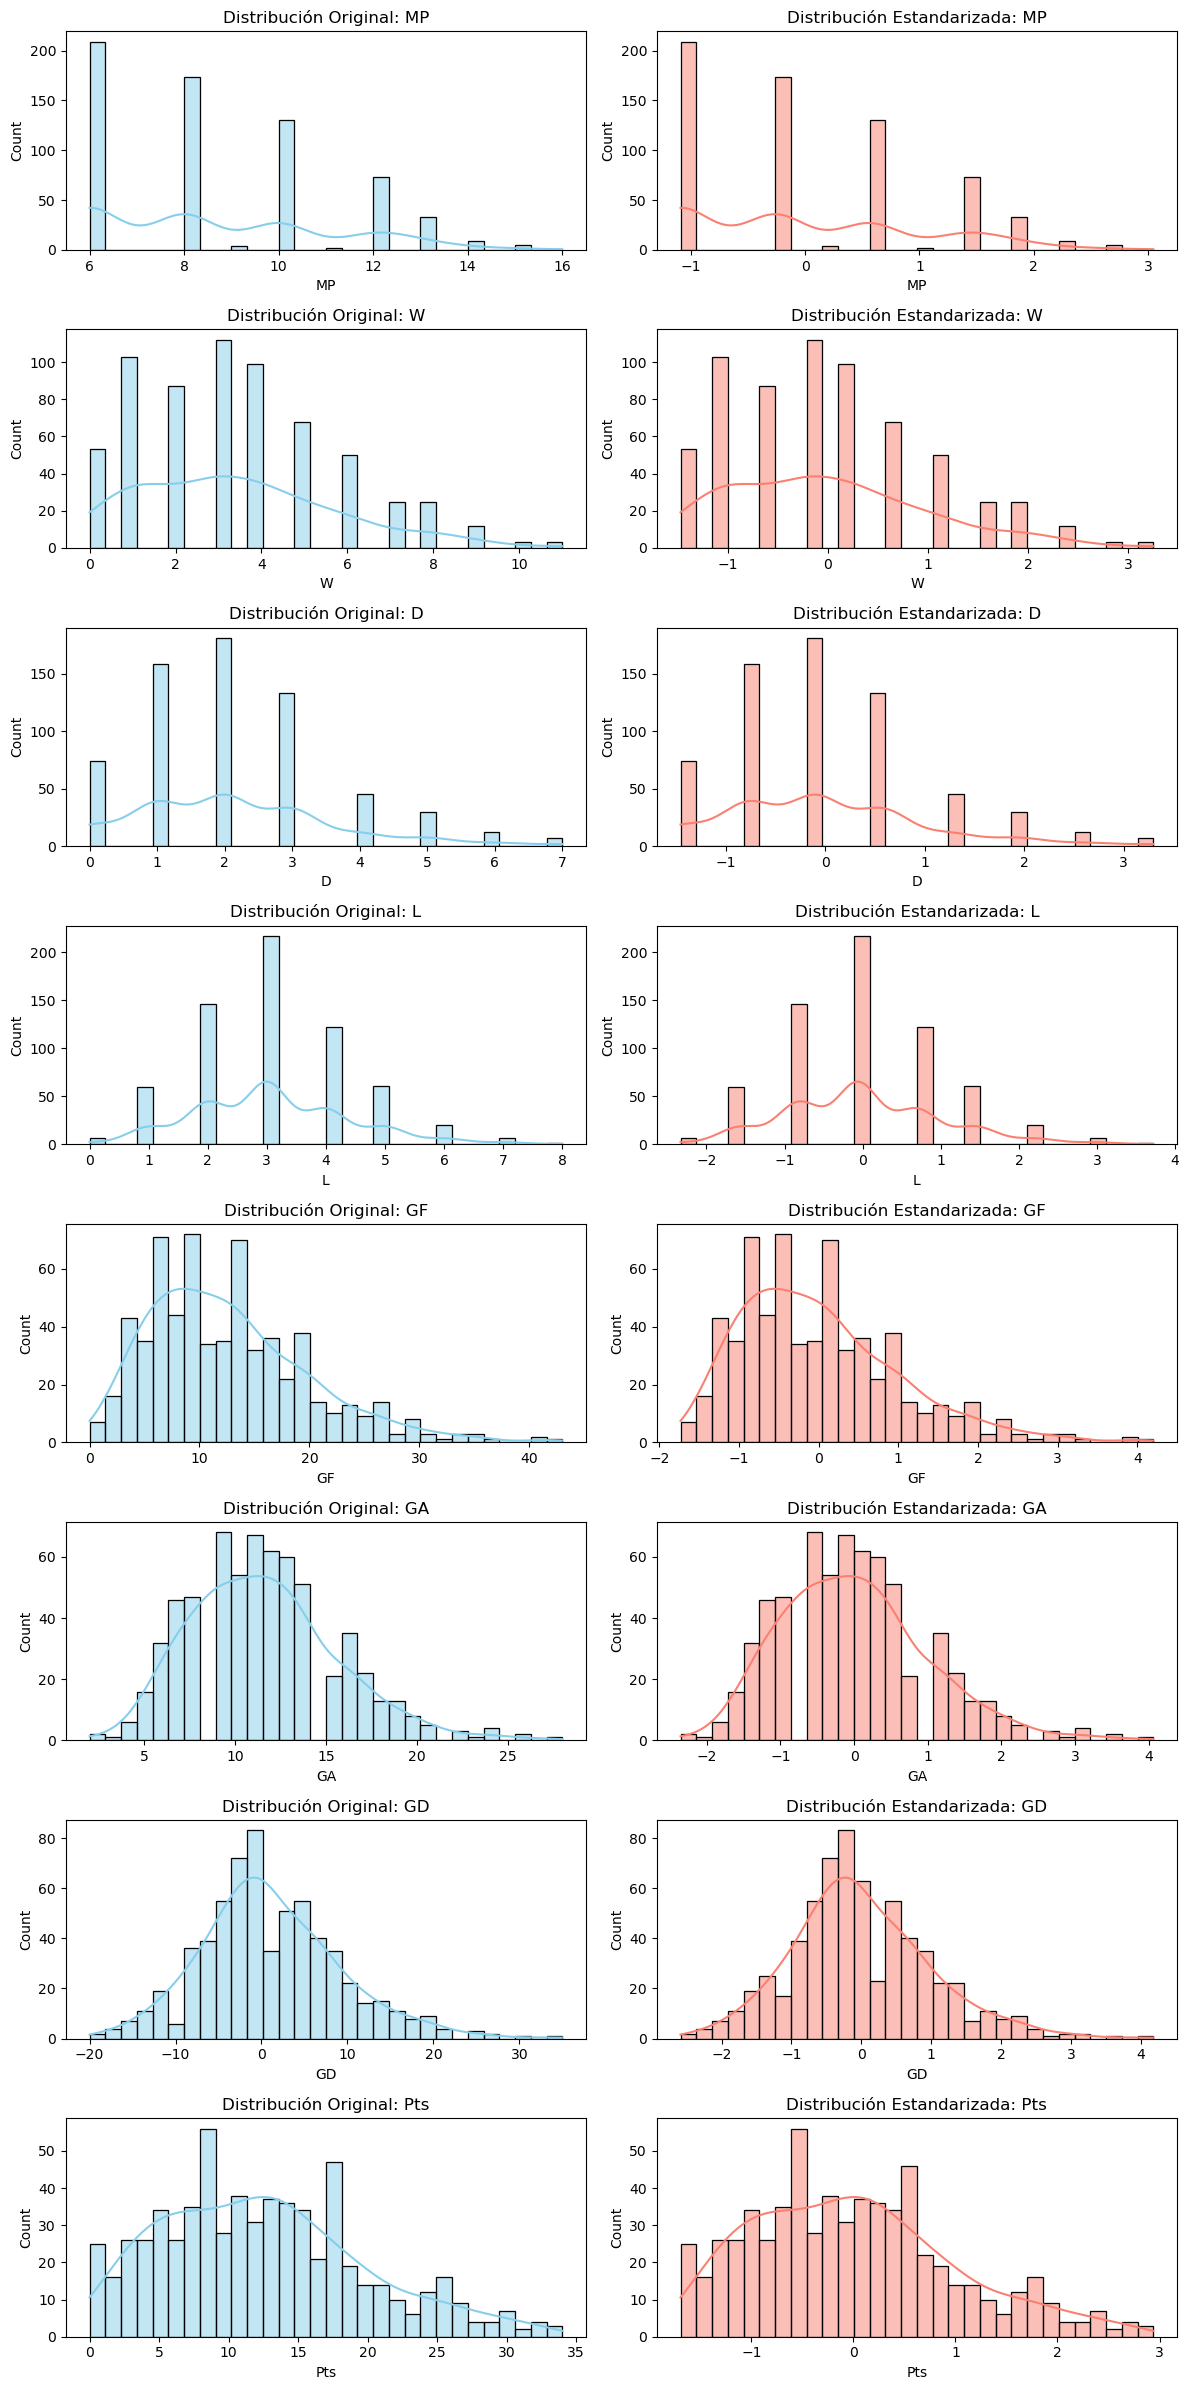

In [13]:


# Para graficar la distribución de los valores originales y estandarizados, seleccionaremos todas las columnas
# que se utilizaron para el clustering. Luego, se crearán gráficos para cada columna comparando sus valores
# originales con los estandarizados.

# Crearemos una figura con subplots para visualizar las distribuciones
num_columns = len(columns_to_cluster)
fig, axs = plt.subplots(num_columns, 2, figsize=(12, num_columns * 3))

for i, col in enumerate(columns_to_cluster):
    # Graficar la distribución de los valores originales
    sns.histplot(cleaned_df[col], kde=True, ax=axs[i, 0], color='skyblue', bins=30)
    axs[i, 0].set_title(f'Distribución Original: {col}')
    
    # Graficar la distribución de los valores estandarizados
    sns.histplot(scaled_df[col], kde=True, ax=axs[i, 1], color='salmon', bins=30)
    axs[i, 1].set_title(f'Distribución Estandarizada: {col}')
    
# Ajustar el layout para evitar superposiciones
plt.tight_layout()
plt.show()


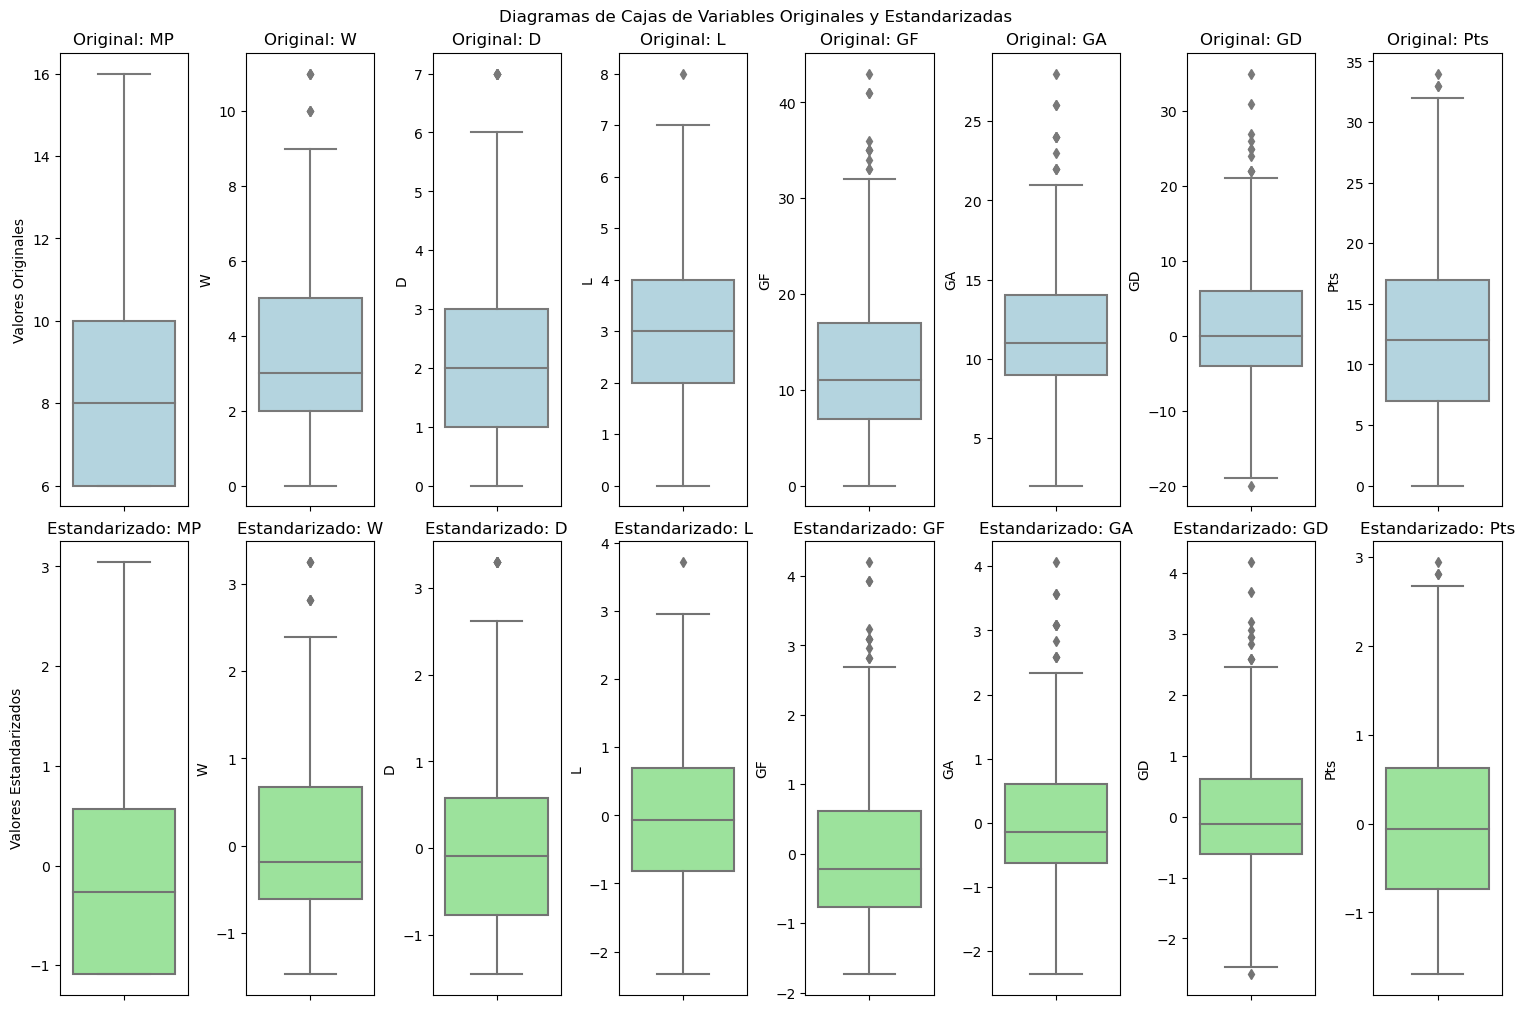

In [14]:
# Para graficar diagramas de cajas de los valores originales y estandarizados, seleccionaremos todas las columnas
# que se utilizaron para el clustering. Luego, se crearán gráficos para cada columna comparando sus valores
# originales con los estandarizados.

# Crearemos una figura con subplots para visualizar las distribuciones en diagramas de caja
fig, axs = plt.subplots(2, num_columns, figsize=(15, 10), constrained_layout=True)

for i, col in enumerate(columns_to_cluster):
    # Diagrama de cajas para los valores originales
    sns.boxplot(data=cleaned_df, y=col, ax=axs[0, i], color='lightblue')
    axs[0, i].set_title(f'Original: {col}')
    axs[0, i].set(xlabel=None)
    
    # Diagrama de cajas para los valores estandarizados
    sns.boxplot(data=scaled_df, y=col, ax=axs[1, i], color='lightgreen')
    axs[1, i].set_title(f'Estandarizado: {col}')
    axs[1, i].set(xlabel=None)

# Ajustar los títulos de los ejes y la figura general
axs[0, 0].set(ylabel='Valores Originales')
axs[1, 0].set(ylabel='Valores Estandarizados')
plt.suptitle('Diagramas de Cajas de Variables Originales y Estandarizadas')
plt.show()


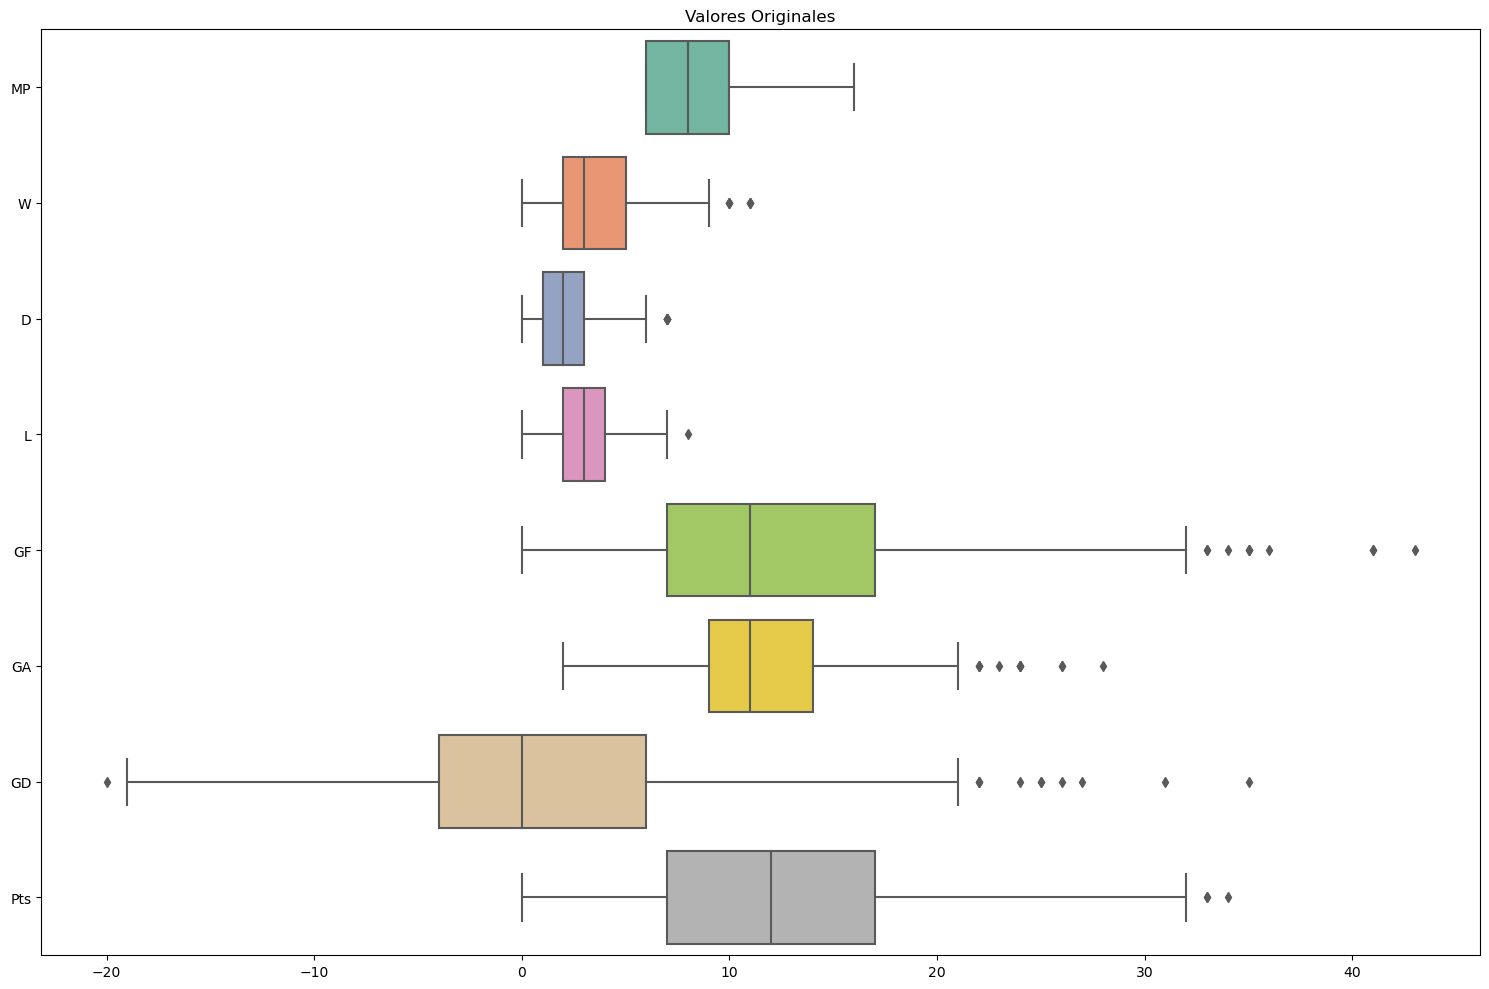

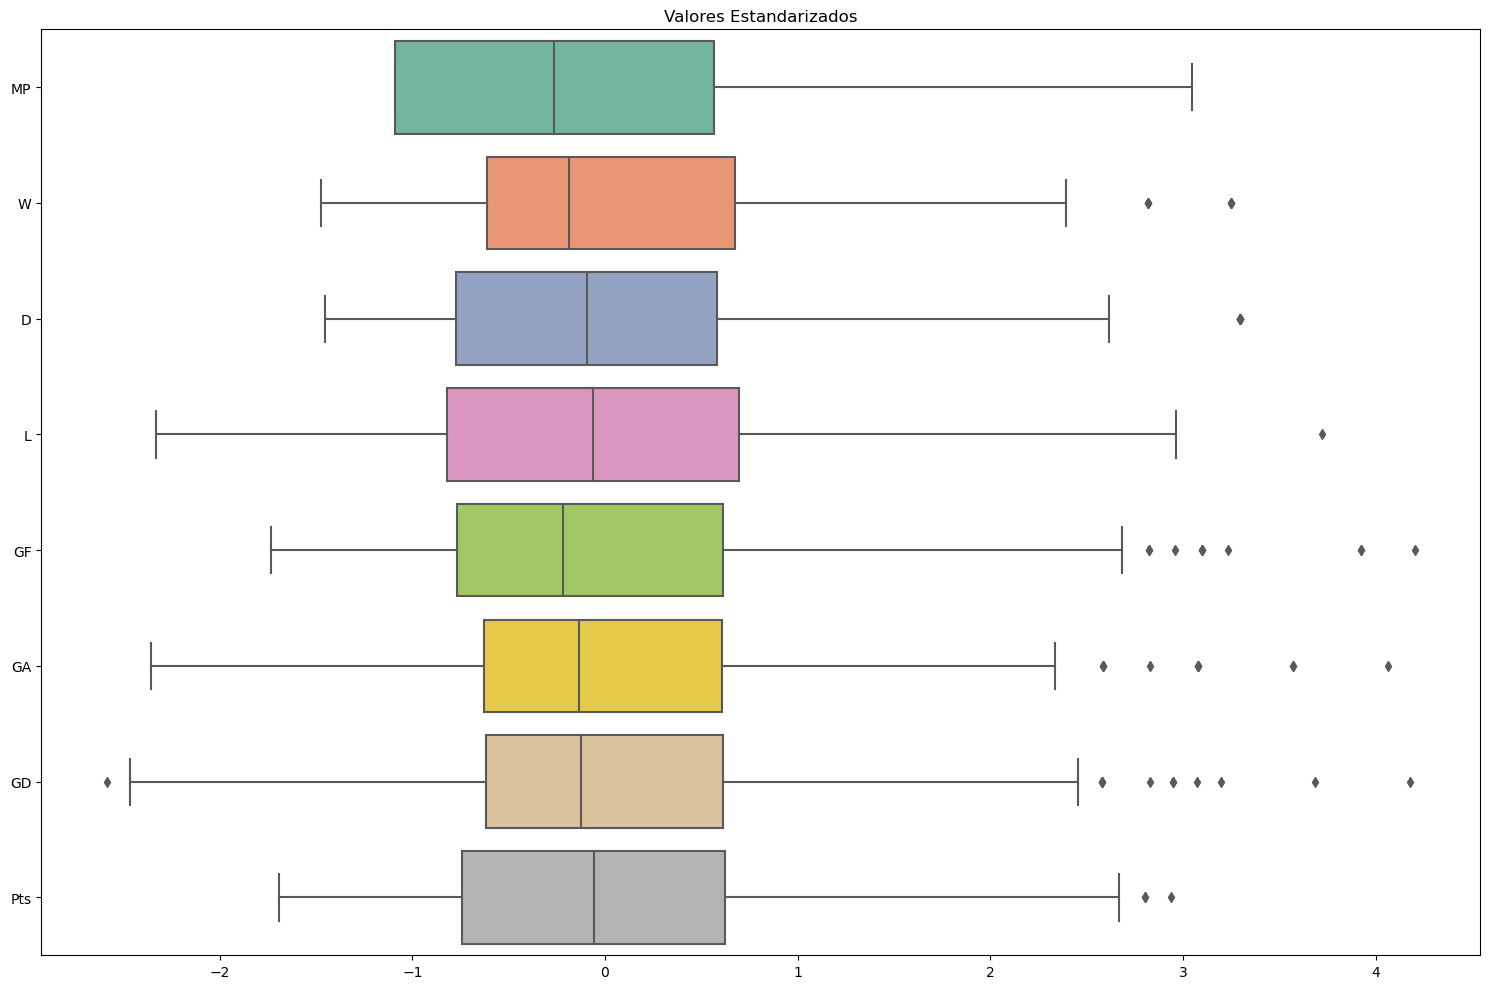

In [16]:
# Corregir el enfoque para generar los diagramas de caja de manera que se eviten errores previos
# Separar en dos figuras para simplificar la visualización y asegurar que el proceso funcione correctamente

# Diagramas de caja para los valores originales
plt.figure(figsize=(15, 10))
sns.boxplot(data=overall_df[columns_to_cluster], orient="h", palette="Set2")
plt.title('Valores Originales')
plt.tight_layout()
plt.show()

# Diagramas de caja para los valores estandarizados
plt.figure(figsize=(15, 10))
sns.boxplot(data=pd.DataFrame(data_normalized, columns=columns_to_cluster), orient="h", palette="Set2")
plt.title('Valores Estandarizados')
plt.tight_layout()
plt.show()
